In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import numpy as np
import graphviz

In [2]:
iris = load_iris()
iris_data = iris.data # feature : 꽃받침 길이,꽃받침 너비,꽃입 길이,꽃입 너비
iris_label = iris.target
columns = iris.target_names
x_train,x_test,y_train,y_test = train_test_split\
    (iris_data,iris_label,test_size=0.3,random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train,y_train)
export_graphviz(dt_clf,out_file='tree.dot',class_names=columns,
                feature_names=iris.feature_names,impurity=True,filled=True)

In [3]:
columns

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

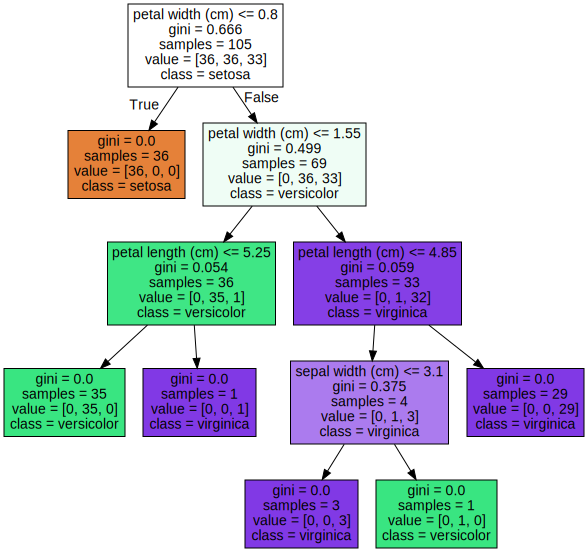

In [4]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# 지니 계수 : 불평등지수 , 계수가 낮을수록 균일도 높음 으로 해석. 0 - 1

In [5]:
iris = load_iris()
iris_data = iris.data # feature : 꽃받침 길이,꽃받침 너비,꽃입 길이,꽃입 너비
iris_label = iris.target
columns = iris.target_names
x_train,x_test,y_train,y_test = train_test_split\
    (iris_data,iris_label,test_size=0.3,random_state=11)
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=11)
dt_clf.fit(x_train,y_train)
export_graphviz(dt_clf,out_file='tree.dot',class_names=columns,
                feature_names=iris.feature_names,impurity=True,filled=True)

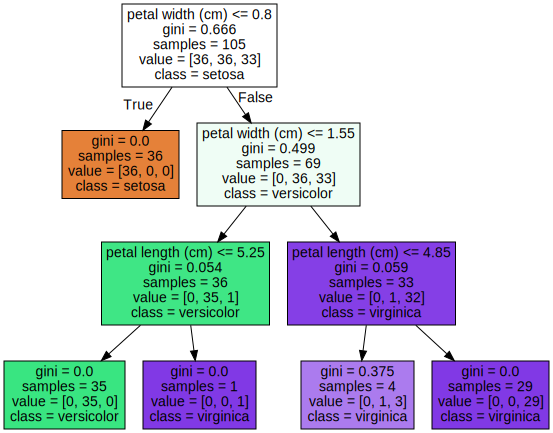

In [6]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# 지니 계수 : 불평등지수 , 계수가 낮을수록 균일도 높음 으로 해석. 0 - 1

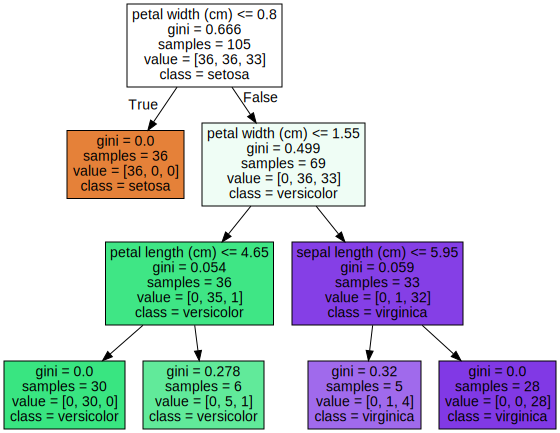

In [7]:
iris = load_iris()
iris_data = iris.data # feature : 꽃받침 길이,꽃받침 너비,꽃입 길이,꽃입 너비
iris_label = iris.target
columns = iris.target_names
x_train,x_test,y_train,y_test = train_test_split\
    (iris_data,iris_label,test_size=0.3,random_state=11)
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=11,min_samples_leaf=5)
dt_clf.fit(x_train,y_train)
export_graphviz(dt_clf,out_file='tree.dot',class_names=columns,
                feature_names=iris.feature_names,impurity=True,filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# 지니 계수 : 불평등지수 , 계수가 낮을수록 균일도 높음 으로 해석. 0 - 1

<AxesSubplot:>

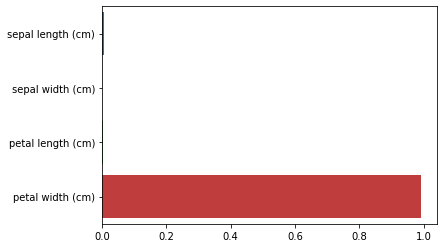

In [8]:
import seaborn as sns
%matplotlib inline

name = iris.feature_names
importance = np.round(dt_clf.feature_importances_,3)
sns.barplot(x=importance,y=name)

In [9]:
print(iris.feature_names)
print(dt_clf.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.00509018 0.         0.00416607 0.99074375]


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
path = '/Users/junho/Desktop/main/big_data/lecture/week7/data/titanic/train.csv'
titanic_df = pd.read_csv(path)
titanic_df.info()
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [12]:
from sklearn import preprocessing
def encoder(df):
    features = ['Sex','Cabin','Embarked']
    encode = preprocessing.LabelEncoder()
    for feature in features:
        encode.fit(df[feature])
        df[feature] = encode.transform(df[feature])
    return df

titanic_df = encoder(titanic_df)
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Cabin  Embarked  
0         A/5 21171   7.2500    146         3  
1          PC 17599  71.2833     81         0  
2  STON/O2. 3101282   7.9250    146         3  
3            113803  53.1000     55         3  
4            373450   8.0500    146         3  


In [13]:
titanic_label = titanic_df['Survived']
titanic_data = titanic_df.drop(['Survived','Name','Ticket','Cabin','PassengerId','Embarked','Parch','SibSp'],axis=1)
columns = titanic_data.columns

In [14]:
titanic_data

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [15]:
x_train,x_test,y_train,y_test = train_test_split\
    (titanic_data,titanic_label,test_size=0.2,random_state=11)
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=11,min_samples_leaf=25)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=25, random_state=11)

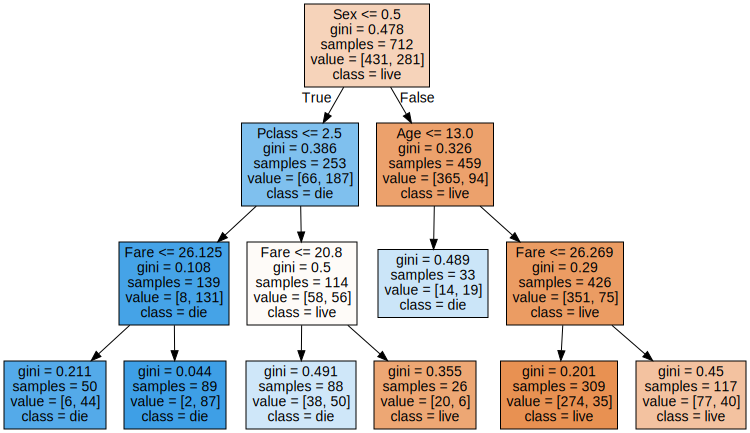

In [32]:
export_graphviz(dt_clf,out_file='titanic.dot',class_names=['live','die'],
                feature_names=columns,impurity=True,filled=True)
# dot file save path : week7
with open('titanic.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# 지니 계수 : 불평등지수 , 계수가 낮을수록 균일도 높음 으로 해석. 0 - 1

<AxesSubplot:>

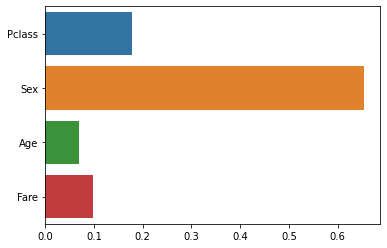

In [17]:
name = columns

importance = np.round(dt_clf.feature_importances_,3)
sns.barplot(x=importance,y=name)

In [18]:
x_train

,Pclass,Sex,Age,Fare
333,3,1,16.0,18.0000
662,1,1,47.0,25.5875
382,3,1,32.0,7.9250
331,1,1,45.5,28.5000
149,2,1,42.0,13.0000
...,...,...,...,...
269,1,0,35.0,135.6333
337,1,0,41.0,134.5000
91,3,1,20.0,7.8542
80,3,1,22.0,9.0000


In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

X_features,y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                          n_classes=3,n_clusters_per_class=1,random_state=0)
# feature : 2 , classfication : 3

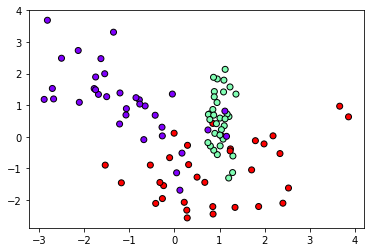

In [20]:
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,cmap='rainbow',edgecolor='k')

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
model


DecisionTreeClassifier(min_samples_leaf=6)

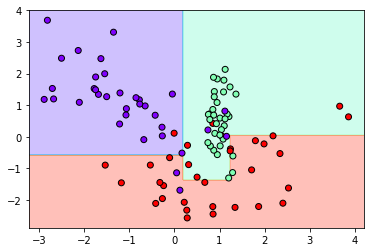

In [22]:
fig,ax = plt.subplots() # zorder ?
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,cmap='rainbow',edgecolor='k',zorder=3)
ax.axis('tight')
xlim_start,xlim_end = ax.get_xlim()
ylim_start,ylim_end = ax.get_ylim()

xx,yy = np.meshgrid(np.linspace(xlim_start,xlim_end,200),np.linspace(ylim_start,ylim_end,200))
Z = model.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3,cmap='rainbow')

In [28]:
def visualize(model,X_features,y_labels):
    fig,ax = plt.subplots() # zorder ?
    plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,cmap='rainbow',edgecolor='k',zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start,xlim_end = ax.get_xlim()
    ylim_start,ylim_end = ax.get_ylim()

    xx,yy = np.meshgrid(np.linspace(xlim_start,xlim_end,200),np.linspace(ylim_start,ylim_end,200))
    Z = model.predict(np.array([xx.ravel(),yy.ravel()]).T).reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha=0.3,cmap='rainbow')

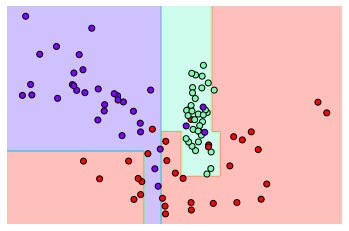

In [31]:
X_features,y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                          n_classes=3,n_clusters_per_class=1,random_state=0)
model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=3).fit(X_features,y_labels)
visualize(model,X_features,y_labels)